# Epidemiology Project 

## Introduction
Epidemiology is the study of health-related events in people and communities, investigating why diseases are more common in certain groups than others, and applying this knowledge to control and prevent further health problems. 

The main ways of modelling epidemiology are deterministic and stochastic models, both models will be covered in this project. The key difference between these models is that deterministic models have no element of randomness and always give exact, predicted outcomes. Stochastic models use randomness by predicting probabilities to provide outcomes over a certain period.

The SIR model is most used as it describes individuals which are either:
- Susceptible to infection (S)
- Infected with disease and contagious (I)
- Removed from transimission by recovery (R)

---
## The Mathematics of The Deterministic SIR Model(A1,A2,A3)

The deterministic model is given by the system of differential equations 

$$
\frac{dS}{dt} = -\beta SI, \quad \frac{dI}{dt} = \beta SI - \mu I, \quad \frac{dR}{dt} = \mu I.
$$

where $\beta$ is the infection rate parameter and $\mu$ is the removal rate parameter. The average infected period = $\frac{1}{\mu}$. 

The first equation shows that the rate of change of susceptible population is directly propotional to the susceptible population and the infected population. This is because if there are more susceptible people, we can make more of them infected and if there are more infected people, they can go around to infect more people. Also, the RHS of equation has a negative sign as the susceptible population is decreasing. The third equation illustrates that the rate of change of infected population is proportional to the infected population as more infected people means more of them are recovered after a period. The second equation means that the rate of change of infected population is the new infected population per unit time subtracts the recovered population per unit time. 

We define **N** to be the total number of individuals so 

$$
N=S+I+R. 
$$

Adding the above three differential equations give us

$$
\frac{dN}{dt} = 0.
$$

Thus, N is constant throughout the epidemic process. 



There are two more important concepts: the **basic reproduction number $R_0$** and the **final size $R(\infty)$**: 

The basic reproduction number is the number of cases of disease arising from each primary case. This is the product of new infection per unit time ($\beta N$) and duration of infection ($\frac{1}{\mu}$):

$$
R_0 = \frac{\beta N}{\mu}.
$$

If $R_0$ > 1, the new outbreak is expected to grow. If $R_0$ < 1, the new outbreak is expected to decline. 

The final size is the total number of individuals infected over the course of an outbreak. This is equivalent to the final recovered population. s.



## Task A1 

The first part of our project investigates the deterministic SIR model by plotting a time-series plot showing S(t),I(t,),and R(t), a phase plane (S,I) ,and a graph showing the relationship between the maximum infected population and $\beta$. Below are the specific tasks:

## Task A1. Baseline case (worth approximately 12% of the marks)
**Assignment:** Using Python, solve the deterministic SIR model numerically and examine the solution for one set of parameter values and one initial condition. Then, adapt the code to rerun the analysis multiple times for different infection rates.

Details: 
- Use the following parameter values for the baseline case (where, throughout this Assignment, time is measured in days): $\beta = 2 \times 10^{-5}$, $\mu = 0.1$, $N = 10^{4}$.
- Initiate the numerical solution starting with 3 infected individuals, with the remainder of the population susceptible.
- Produce two plots: a time-series showing $S(t)$, $I(t)$ and $R(t)$ and a phase plane (in the $(S,I)$ plane).
- On both plots, indicate the point on the trajectory where $I$ reaches its maximum as black circles, and print this maximum value (when you print the value, round this value to the largest integer that is less than this value).
- Now repeat this analysis a large number of times for different values of $\beta$ (without generating a figure each time; so as to not generate a huge number of figures!) Plot the maximum value of $I$ as a function of $\beta$, choosing an appropriate range of values of $\beta$ (and sufficiently many values) to be able to see the dependence clearly.

Hint: You might like to Google the appropriate NumPy function that finds the maximum value in a vector. For the last part, use a FOR loop rather than changing the value of $\beta$ manually.

Once you have completed this, you might like to help your team member who is doing Task A4 below!

*Insert code and markdown cells below, as appropriate, in which to provide your response to this task.*

---

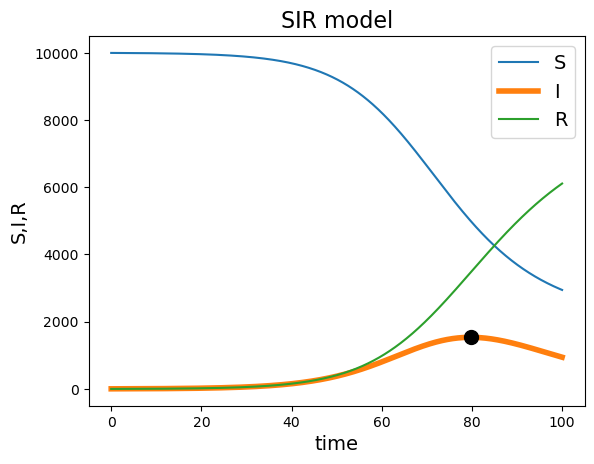

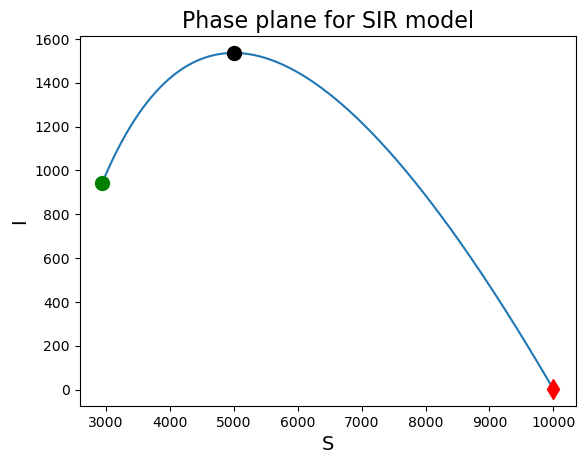

Maximum I (floor): 1535


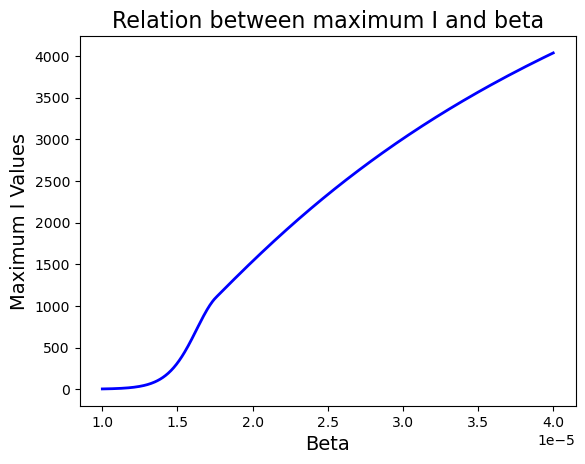

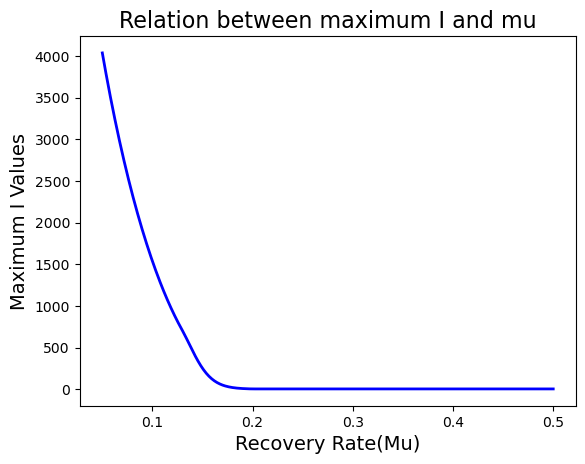

In [22]:
#import libraries 
import numpy as np 
import matplotlib.pyplot as plt
from scipy.integrate import odeint #To solve differential equations

#Define the differential equations for SIR Model
def SIR(y, t, beta, mu):
    S, I, R = y
    N = S + I + R #Total poluation N is constant over time
    Sdot = -beta * S * I #Rate of change of susceptible population is negative and is proportional to the susceptible population and the infectious population. Beta is the rate of infection.
    Idot = beta * S * I - mu * I #rate of change of infectious population= rate of change of susceptible population - rate of change of recovered population.
    Rdot = mu * I #rate of change of recovered population is proportional to the infectious population. Mu is the rate of removal.
    return Sdot, Idot, Rdot

#Set up time grid for the solution
tf = 100
Nsteps = 1000
t = np.linspace(0, tf, Nsteps+1)
#Initial conditions and put into array y0
S0 = 10**4 - 3
I0 = 3
R0 = 0
y0 = np.array([S0, I0, R0])
beta0 = 2e-5
mu0 = 0.1

#Solve the SIR Model
y_sol = odeint(SIR, y0, t, args=(beta0, mu0)) #Use args to pass additional arguments beta and mu into the function
S = y_sol[:,0]
I = y_sol[:,1]
R = y_sol[:,2]

#Find out the maximum infection point
t_max = t[np.argmax(I)] #Instead of using max() function, using argmax() function to find out the indice of maximum I since we also need to find out the corresponding susceptible population value and time t.
S_max = S[np.argmax(I)]
I_max = I[np.argmax(I)]
max_I_floor = int(np.floor(I_max)) #Use floor function to determine the largest integer less than this value and use int() function to make sure it is the form of integer.

#Plot time series 
plt.plot(t, S, label = "S")
plt.plot(t, I, lw = 4, label = "I")
plt.plot(t, R, label = "R")
plt.xlabel("time", fontsize = 14)
plt.ylabel("S,I,R", fontsize = 14)
plt.plot(t_max, I_max, 'ko', markersize=10) #mark the maximum I point
plt.title("SIR model", fontsize = 16)
plt.legend(fontsize = 14)
plt.show()        

#Plot Phase Plane
plt.plot(S, I)
plt.xlabel("S", fontsize = 14)
plt.ylabel("I", fontsize = 14)
plt.plot(S_max, I_max, 'ko', markersize=10) #mark the maximum I point 
plt.title("Phase plane for SIR model", fontsize = 16)

plt.plot(S[0], I[0], 'rd', markersize = 10)
plt.plot(S[-1], I[-1], 'go', markersize = 10)
plt.show()

print(f"Maximum I (floor): {max_I_floor}") #Print the maximum value of I (rounded to the largest integer less than this value)

#Beta values vary from 1e-5 to 4e-5
beta_values = np.linspace(1e-5, 4e-5, 500)  
max_I_values_1 = [] #use this list to store the maximum I value for each beta 

#Use for loop to iterate over a range of beta values 
for beta in beta_values:
    y_sol = odeint(SIR, y0, t, args=(beta, mu0))
    I = y_sol[:,1]
    max_I_values_1.append(np.max(I)) #use append() function to add this maximum I value for each beta to the end of the list max_I_values_1

#Plot the maximum value of I as a function of beta 
plt.plot(beta_values, max_I_values_1, 'b-', lw=2)
plt.xlabel('Beta', fontsize=14)
plt.ylabel('Maximum I Values', fontsize=14)
plt.title('Relation between maximum I and beta', fontsize=16)
plt.show()

#Mu values vary from 0.05 to 0.5
mu_values = np.linspace(0.05, 0.5, 500)  
max_I_values_2 = [] #use this list to store the maximum I value for each mu

#Use for loop to iterate over a range of mu values 
for mu in mu_values:
    y_sol = odeint(SIR, y0, t, args=(beta0, mu))
    I = y_sol[:,1]
    max_I_values_2.append(np.max(I)) #use append() function to add this maximum I value for each mu to the end of the list max_I_values_2

#Plot the maximum value of I as a function of mu 
plt.plot(mu_values, max_I_values_2, 'b-', lw=2)
plt.xlabel('Recovery Rate(Mu)', fontsize=14)
plt.ylabel('Maximum I Values', fontsize=14)
plt.title('Relation between maximum I and mu', fontsize=16)
plt.show()

## Result of A1

- The first diagram presents a time-series plot where the x-axis represents time and y-axis represents susceptible, infected, and recovered population. It demonstrates that the infected population increases exponentially before reaching the peak infected population value and it then decreases after the local maximum point due to the decreased susceptble population and increased recovered population. 

- The second diagram is a phase plane for SIR model. Its x-axis is the susceptible population while the y-axis is the infected population. The epidemic process starts at the red points. As time goes by, the susceptible population decreases while the infected population firstly increases before reaching the peak infected population value and then decreases afer that.

- The third diagram plots the relationship between different values of $\beta$ and the corresponding maximum infected population. The x-axis is the $\beta$ values while the y-axis is the maximum infected population. In general, as $\beta$, the transmission rate increases, maximum infected population increases as well. The relationship is nonlinear: the curve shoots off at the beginning and then increases at a decreasing rate. We can conclude from this graph that higher transmission rates cause higher maximum infected population and vice versa so any interventions that could reduce the transmission rates such as social distancing and vaccinations could possibly reduce the peak infection and flatten the epidemic curve. We will analyze these two interventions in A2 and A3.

- It would be useful to also consider the relationship between maximum infected population I and $\mu$. Hence, the fourth diagram is plotted where the x-axis is the recovery rate ($\mu$) and y-axis is the maximum infected population. Overall, as the recovery rate increases, the maximum infected population decreases but the relationship is nonlinear: at low recovery rate values, a decrease in the recovery rate will greatly reduce the maximum infected population while at high recovery rate values, a decrease in the recovery rate does not have that much impact on the maximum infected population. This conclusion suggests that effective treatment and healthcare access can increase recover rate to reduce maximum infectious population but if the recover rate is already high, it would more effective to implement methods that could reduce transmission rate.

.
